# Pandas Express - Amir
# TTC-Delays project
Team Members: 

Gaspare Castagna

Amirhossein Heidari

Avery Hoffer

Michael Metallo

In [2]:
import numpy as numpy
import pandas as pd
import os
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
df_bus_delay=pd.read_csv('bus_delays.csv')
df_bus_delay.head(10000000)

C:\Users\ASuS\AppData\Local\Temp\ipykernel_13096\3754450213.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bus_delay=pd.read_csv('bus_delays.csv')


,Unnamed: 0,Route,Day,Location,Incident,Min Delay,Min Gap,Vehicle,DateTime,analysis
0,0,95.0,Wednesday,York Mills station,Mechanical,10.0,20.0,1734.0,2014-01-01 00:23:00,yorkmillsstation
1,1,102.0,Wednesday,Entire run for route,General Delay,33.0,66.0,8110.0,2014-01-01 00:55:00,entirerunforroute
2,2,54.0,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,7478.0,2014-01-01 01:28:00,lawrenceave&wardenave
3,3,112.0,Wednesday,Kipling Station,Emergency Services,18.0,36.0,8084.0,2014-01-01 01:30:00,kiplingstation
4,4,24.0,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,7843.0,2014-01-01 01:37:00,ellesmererd&victoriaparkave
...,...,...,...,...,...,...,...,...,...,...
588586,588586,32,Saturday,EGLINTON AND EDITH (W,Mechanical,2.0,24.0,1085.0,2022-12-31 23:21:00,bicknellave-yorkciviccentre&eglintonave
588587,588587,113,Saturday,DANFORTH AND DAWES,Vision,20.0,40.0,8589.0,2022-12-31 23:28:00,danforthave&dawesrd
588588,588588,72,Saturday,LOWER SHERBOURNE AND L,Security,18.0,36.0,8493.0,2022-12-31 23:56:00,lowersherbournest&theesplanade
588589,588589,22,Saturday,BINGHAM LOOP,Cleaning - Unsanitary,10.0,20.0,8582.0,2022-12-31 00:17:00,binghamloop


In [4]:
import plotly.express as px

Incident_data = df_bus_delay['Incident'].value_counts().reset_index()
Incident_data_major = Incident_data[Incident_data['count'] >= 5000]
Incident_data_2=Incident_data
# Update the 'Incident' column to 'Other' for incidents with less than 5000 counts
Incident_data_2['Incident'] = Incident_data_2.apply(lambda row: 'Other' if row['count'] < 5000 else row['Incident'], axis=1)

# Set the size of the figure using the width and height parameters
fig = px.pie(
    Incident_data_2,
    names='Incident',
    values='count',
    title='Pie Chart Example',
    width=700,
    height=600,
    color_discrete_sequence=px.colors.qualitative.Set2  # Use a more vibrant color palette
)

fig.update_traces(
    texttemplate='',  # Set the text template to an empty string to hide percentages
    marker=dict(line=dict(color='black', width=2))  # Add borders to the pie chart
)

# Customize the text font
fig.update_layout(font=dict(family='Arial', size=18))

fig.show()


C:\Users\ASuS\AppData\Local\Temp\ipykernel_13096\1731111743.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



,month_year,count,month
0,2014-01,9822,1
1,2014-02,8115,2
2,2014-03,8127,3
3,2014-04,7881,4
4,2014-05,8029,5


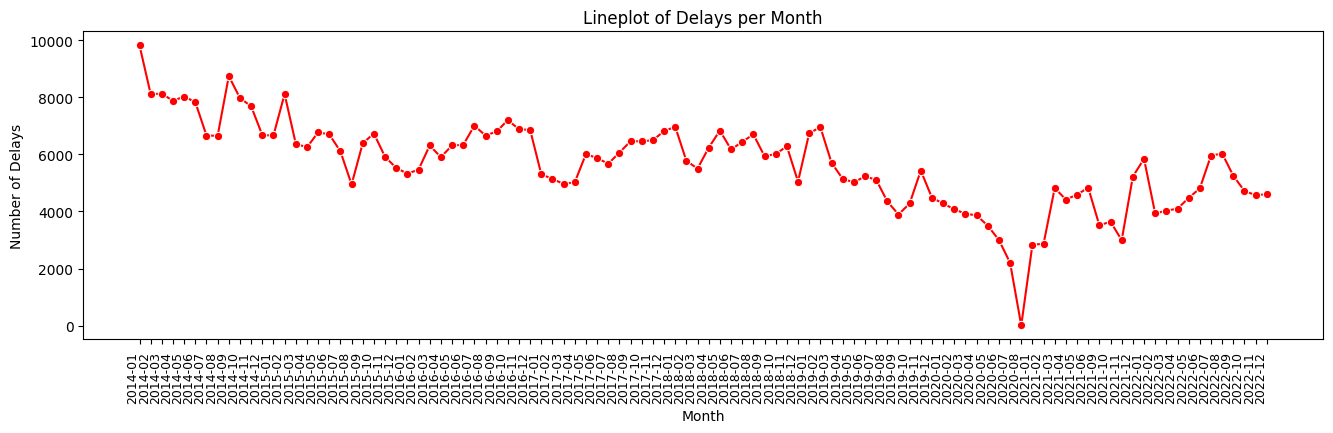

In [5]:

df_bus_delay['DateTime'] = pd.to_datetime(df_bus_delay['DateTime'])
df_bus_delay['just_date'] = df_bus_delay['DateTime'].dt.date
date_delays = df_bus_delay['just_date'].value_counts().reset_index()
date_delays = date_delays.sort_values(by='just_date')


date_delays['just_date'] = pd.to_datetime(date_delays['just_date'])
date_delays['month_year'] = date_delays['just_date'].dt.strftime('%Y-%m')

date_delays_2 = date_delays.groupby('month_year')['count'].sum('count').reset_index()
date_delays_2.columns = ['month_year', 'count']

date_delays_2['month'] = pd.to_datetime(date_delays_2['month_year'])
date_delays_2['month'] = date_delays_2['month'].dt.month


# Plotting
plt.figure(figsize=(16, 4))
ax = sns.lineplot(data=date_delays_2, x='month_year', y='count', color='red', marker='o')
ax.set(title='Lineplot of Delays per Month', xlabel='Month', ylabel='Number of Delays')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=10)
ax.tick_params(axis='x', which='both', labelsize=9, pad=5)  



date_delays_2.head()

C:\Users\ASuS\AppData\Local\Temp\ipykernel_13096\1326431998.py:3: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\ASuS\AppData\Local\Temp\ipykernel_13096\1326431998.py:40: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



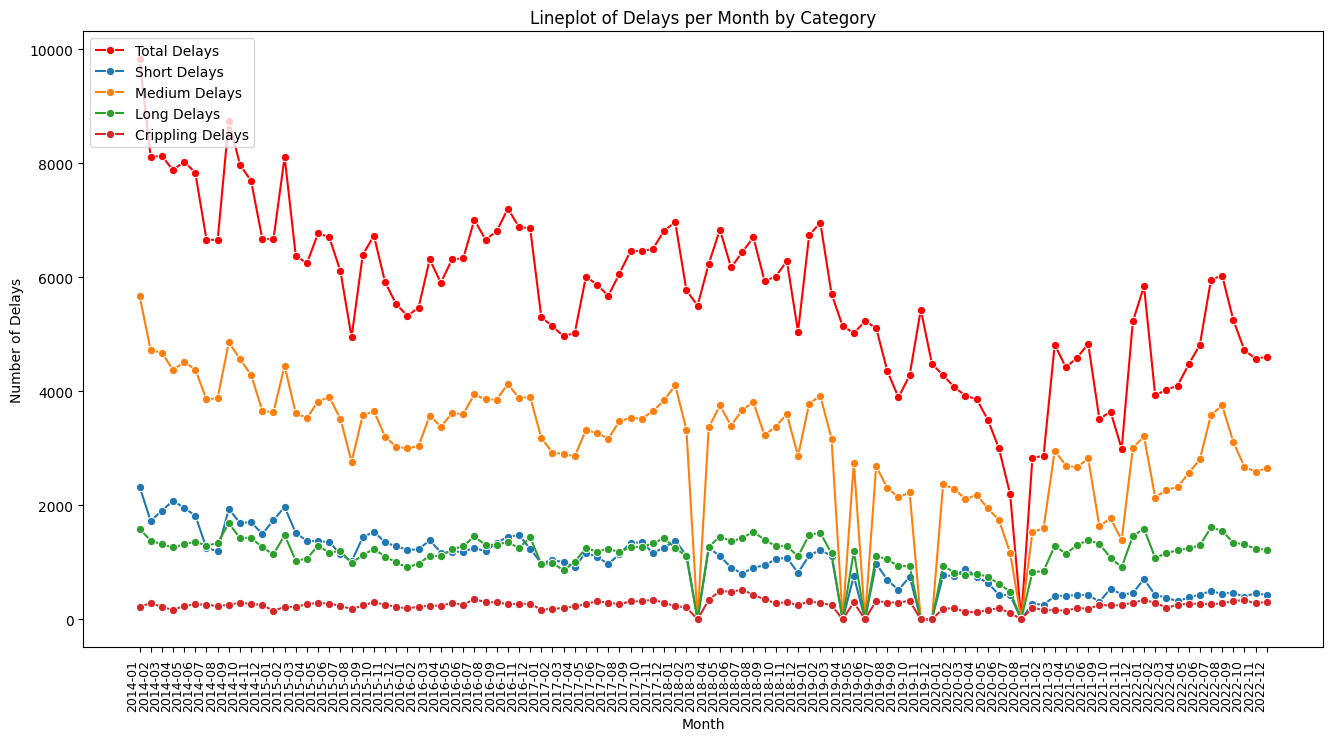

,month_year,Total_Delays,Short,Medium,Long,Crippling
0,2014-01,9822,2330,5680,1589,220
1,2014-02,8115,1728,4719,1382,285
2,2014-03,8127,1907,4680,1316,220
3,2014-04,7881,2079,4373,1262,164
4,2014-05,8029,1955,4516,1317,239


In [6]:
# Assuming df_bus_delay is your DataFrame with 'DateTime' and 'Min Delay' columns
# If your DataFrame has different column names, replace 'DateTime' and 'Min Delay' with the actual column names.
df_bus_delay = pd.read_csv('bus_delays.csv')
df_bus_delay['DateTime'] = pd.to_datetime(df_bus_delay['DateTime'])

# Extract date and create a new column 'just_date'
df_bus_delay['just_date'] = df_bus_delay['DateTime'].dt.date

# Extract month and year, and create a new column 'month_year'
df_bus_delay['month_year'] = df_bus_delay['DateTime'].dt.strftime('%Y-%m')

# Define the delay thresholds
short_threshold = 5
medium_threshold = 15
long_threshold = 30

# Create new column 'Delay_Category' based on delay thresholds
df_bus_delay['Delay_Category'] = pd.cut(df_bus_delay['Min Delay'],
                                       bins=[-float('inf'), short_threshold, medium_threshold, long_threshold, float('inf')],
                                       labels=['Short', 'Medium', 'Long', 'Crippling'])

# Group by 'month_year' and 'Delay_Category' to count delays in each category for each month
date_delay_categories = df_bus_delay.groupby(['month_year', 'Delay_Category']).size().unstack(fill_value=0).reset_index()

# Group by 'month_year' to calculate total delays for each month
date_total_delays = df_bus_delay.groupby('month_year').size().reset_index(name='Total_Delays')

# Merge the DataFrames on 'month_year'
date_delays_2 = pd.merge(date_total_delays, date_delay_categories, how='left', on='month_year')

# Plotting
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=date_delays_2, x='month_year', y='Total_Delays', color='red', marker='o', label='Total Delays')

# Plot each delay category
for category in ['Short', 'Medium', 'Long', 'Crippling']:
    ax = sns.lineplot(data=date_delays_2, x='month_year', y=category, marker='o', label=f'{category} Delays')

ax.set(title='Lineplot of Delays per Month by Category', xlabel='Month', ylabel='Number of Delays')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=10)
ax.tick_params(axis='x', which='both', labelsize=9, pad=5)

# Display legend
ax.legend(loc='upper left')

# Show the plot
plt.show()

# Display the resulting DataFrame
date_delays_2.head()

C:\Users\ASuS\AppData\Local\Temp\ipykernel_13096\2347672809.py:3: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\ASuS\AppData\Local\Temp\ipykernel_13096\2347672809.py:47: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



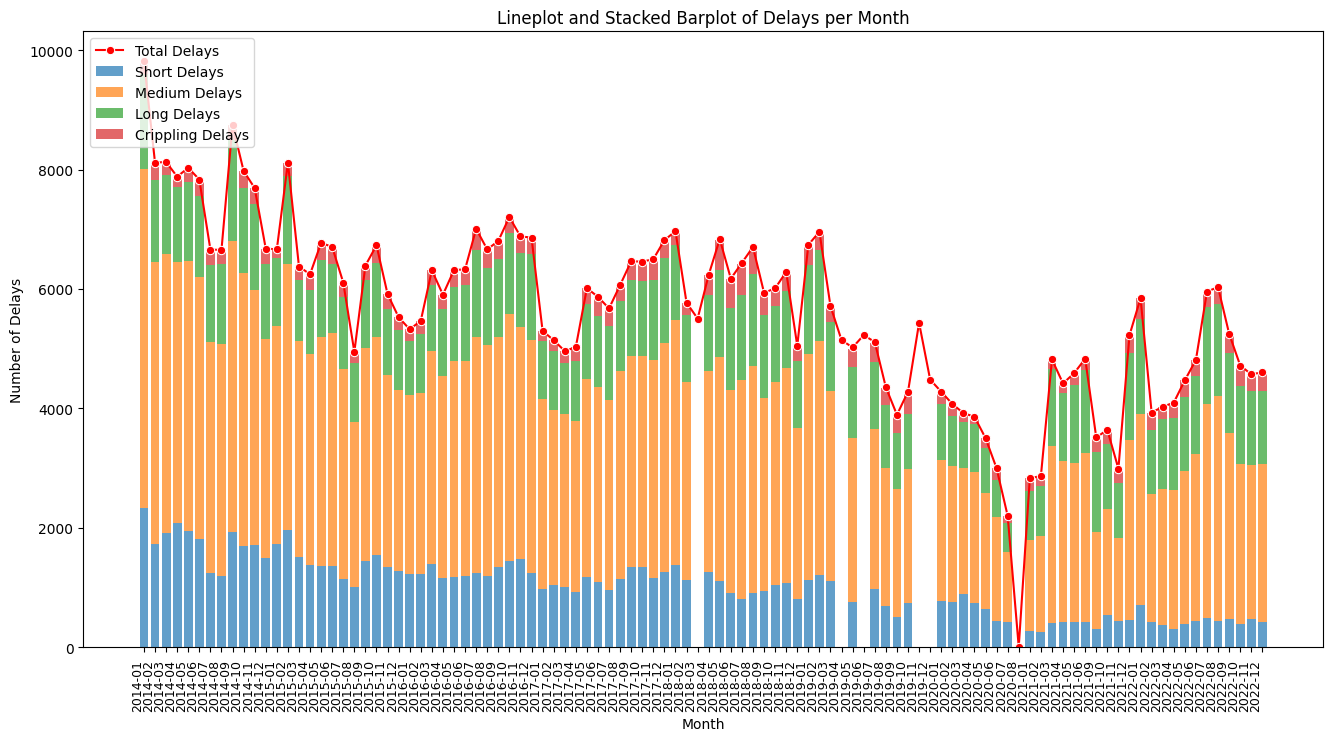

In [7]:
# Assuming df_bus_delay is your DataFrame with 'DateTime' and 'Min Delay' columns
# If your DataFrame has different column names, replace 'DateTime' and 'Min Delay' with the actual column names.
df_bus_delay = pd.read_csv('bus_delays.csv')
df_bus_delay['DateTime'] = pd.to_datetime(df_bus_delay['DateTime'])

# Extract month and year, and create a new column 'month_year'
df_bus_delay['month_year'] = df_bus_delay['DateTime'].dt.strftime('%Y-%m')

# Define the delay thresholds
short_threshold = 5
medium_threshold = 15
long_threshold = 30

# Create new column 'Delay_Category' based on delay thresholds
df_bus_delay['Delay_Category'] = pd.cut(df_bus_delay['Min Delay'],
                                       bins=[-float('inf'), short_threshold, medium_threshold, long_threshold, float('inf')],
                                       labels=['Short', 'Medium', 'Long', 'Crippling'])

# Group by 'month_year' and 'Delay_Category' to count delays in each category for each month
date_delay_categories = df_bus_delay.groupby(['month_year', 'Delay_Category']).size().unstack(fill_value=0).reset_index()

# Group by 'month_year' to calculate total delays for each month
date_total_delays = df_bus_delay.groupby('month_year').size().reset_index(name='Total_Delays')

# Merge the DataFrames on 'month_year'
date_delays_2 = pd.merge(date_total_delays, date_delay_categories, how='left', on='month_year')

# Plotting
plt.figure(figsize=(16, 8))

# Line chart for total delays
ax = sns.lineplot(data=date_delays_2, x='month_year', y='Total_Delays', color='red', marker='o', label='Total Delays')

# Stacked bar chart for delay categories
categories = ['Short', 'Medium', 'Long', 'Crippling']
bottom_values = [0] * len(date_delays_2)

for category in categories:
    if category in date_delays_2.columns:
        ax.bar(date_delays_2['month_year'], date_delays_2[category], label=f'{category} Delays', alpha=0.7, bottom=bottom_values)
        bottom_values += date_delays_2[category]

ax.set(title='Lineplot and Stacked Barplot of Delays per Month',
       xlabel='Month', ylabel='Number of Delays')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=10)
ax.tick_params(axis='x', which='both', labelsize=9, pad=5)

# Display legend
ax.legend(loc='upper left')

# Show the plot
plt.show()

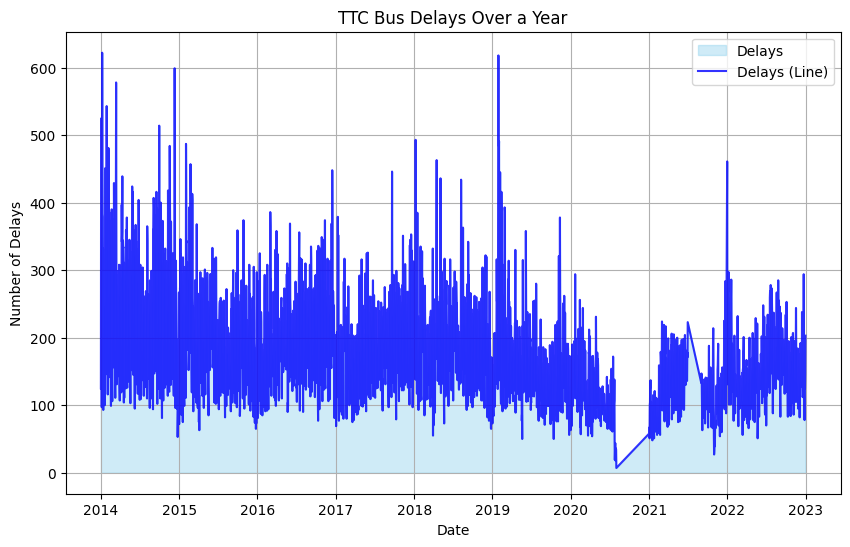

In [8]:
date_delays.head()

# Sort the DataFrame by date if it's not already sorted
date_delays = date_delays.sort_values(by='just_date')

# Plotting the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(date_delays['just_date'], date_delays['count'], color='skyblue', alpha=0.4, label='Delays')
plt.plot(date_delays['just_date'], date_delays['count'], color='blue', alpha=0.8, label='Delays (Line)')
plt.xlabel('Date')
plt.ylabel('Number of Delays')
plt.title('TTC Bus Delays Over a Year')
plt.legend()
plt.grid(True)
plt.show()

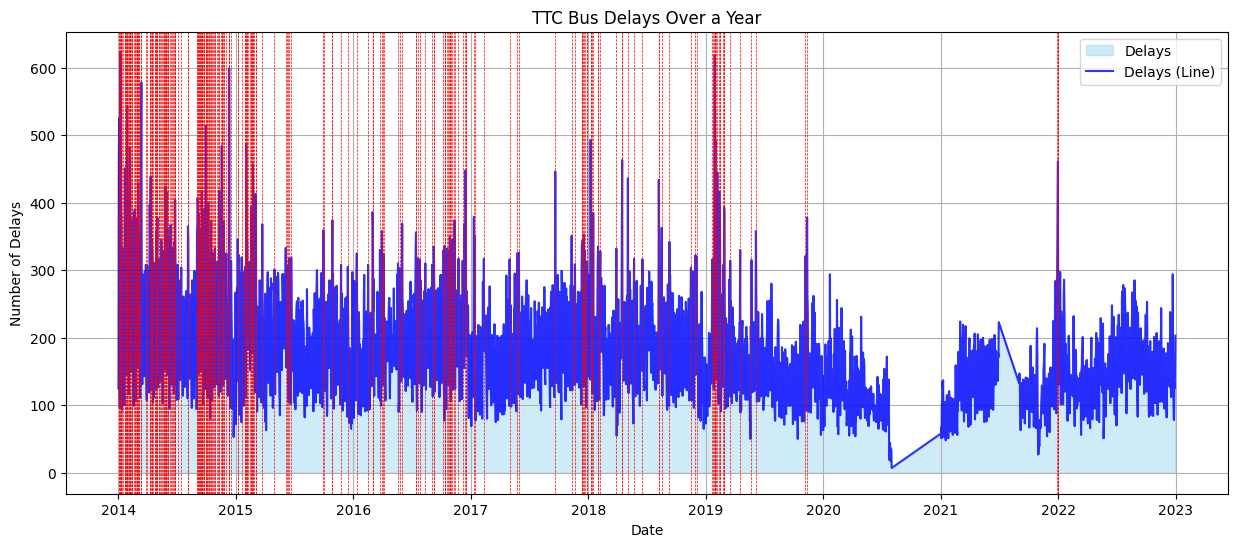

In [9]:
# Assuming your DataFrame is named date_delays
# Ensure 'just_date' is in datetime format
date_delays['just_date'] = pd.to_datetime(date_delays['just_date'])

# Sort the DataFrame by date if it's not already sorted
date_delays = date_delays.sort_values(by='just_date')

# Plotting the area chart
plt.figure(figsize=(15, 6))

# Fill the area with skyblue color for all days
plt.fill_between(date_delays['just_date'], date_delays['count'], color='skyblue', alpha=0.4, label='Delays')

# Plot the line in blue for all days
plt.plot(date_delays['just_date'], date_delays['count'], color='blue', alpha=0.8, label='Delays (Line)')

# Identify and draw a vertical line in red for days with more than 100 delays
high_delay_days = date_delays[date_delays['count'] > 300]
for date in high_delay_days['just_date']:
    plt.axvline(date, color='red', linestyle='--', linewidth=0.5)

plt.xlabel('Date')
plt.ylabel('Number of Delays')
plt.title('TTC Bus Delays Over a Year')
plt.legend()
plt.grid(True)
plt.show()

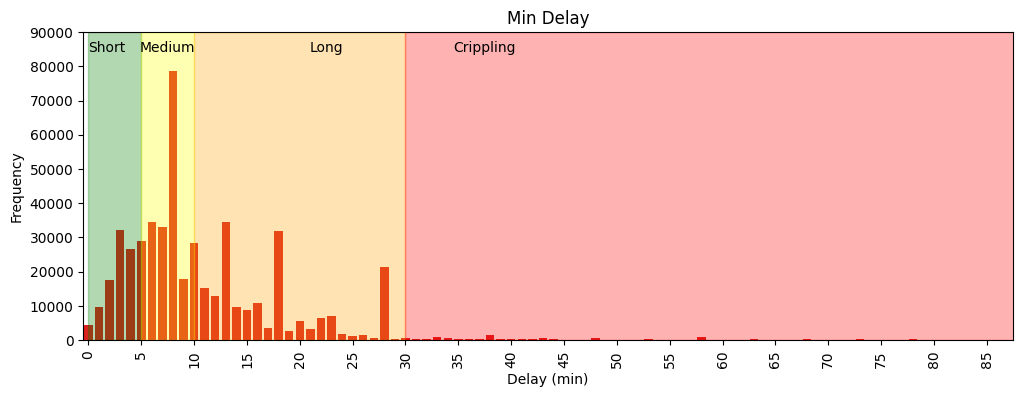

,Min Delay,count
23,2.0,4361
17,3.0,9605
12,4.0,17621
4,5.0,32121
9,6.0,26585
...,...,...
65,85.0,141
118,86.0,60
104,87.0,67
121,88.0,56


In [10]:
df_duration = df_bus_delay['Min Delay'].value_counts().reset_index()
df_duration = df_duration[(df_duration['Min Delay'] > 1) & (df_duration['Min Delay'] < 90)]
df_duration = df_duration.sort_values(by='Min Delay')

plt.figure(figsize=(12, 4))
ax = sns.barplot(data=df_duration, x='Min Delay', y='count', color='red')
ax.set(title='Min Delay', xlabel='Delay (min)', ylabel='Frequency')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set x-axis ticks for every 5 minutes
xticks = np.arange(0, 90, 5)
ax.set_ylim(0, 90000)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=90)


# Add regions for short, medium, long, and crippling waiting times
ax.axvspan(0, 5, alpha=0.3, color='green', label='Short')
ax.axvspan(5, 10, alpha=0.3, color='yellow', label='Medium')
ax.axvspan(10, 30, alpha=0.3, color='orange', label='Long')
ax.axvspan(30, 90, alpha=0.3, color='red', label='Crippling')

# Add labels inside the regions
ax.text(1.75, ax.get_ylim()[1] * 0.95, 'Short', ha='center', va='center', color='black')
ax.text(7.5, ax.get_ylim()[1] * 0.95, 'Medium', ha='center', va='center', color='black')
ax.text(22.5, ax.get_ylim()[1] * 0.95, 'Long', ha='center', va='center', color='black')
ax.text(37.5, ax.get_ylim()[1] * 0.95, 'Crippling', ha='center', va='center', color='black')

# Set x-axis limit explicitly to remove gaps
ax.set_xlim(-0.5, len(df_duration) - 0.5)

plt.show()
df_duration.head(1000)

In [11]:
df_bus_delay['Route'] = pd.to_numeric(df_bus_delay['Route'], errors='coerce')
# Drop rows where 'Route' is NaN
df_bus_delay.dropna(subset=['Route'], inplace=True)

df_routes = df_bus_delay['Route'].value_counts().reset_index()
df_routes = df_routes[df_routes['count']>100]
df_routes = df_routes.sort_values(by='count',ascending=False)
#df_routes.head()
df_routes_top20=df_routes.head(21)

df_routes_top20['Route'] = df_routes_top20['Route'].astype(str)  # Convert 'Route' to string
df_routes_top20 = df_routes_top20.sort_values(by='count', ascending=False)  # Sort by count
df_routes_top20.head(11)



C:\Users\ASuS\AppData\Local\Temp\ipykernel_13096\775986200.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Route,count
0,29.0,16007
1,52.0,15424
2,32.0,15109
3,36.0,14000
4,54.0,12824
5,53.0,11989
6,95.0,11603
7,60.0,11166
8,35.0,11148
9,102.0,10594


In [13]:

list_avoidable = ['Late Leaving Garage','Cleaning','Late Entering Service','Cleaning - Unsanitary','Cleaning - Disinfection', 'Late Leaving Garage - Operations','Late Leaving Garage - Management','Investigation']
df_delays_avoidable=df_bus_delay[df_bus_delay['Incident'].isin(list_avoidable)]
df_delays_avoidable.head()
print(df_delays_avoidable['Incident'].unique())

# Count the frequency of each incident
df_delays_avoidable_count = df_delays_avoidable['Incident'].value_counts().reset_index()
df_delays_avoidable_count.head()
# Create a doughnut chart using plotly
fig = px.pie(df_delays_avoidable_count, names='Incident', values='count', title='Frequency of Incidents', hole=0.4, width=1200, height=700,
             color_discrete_sequence=px.colors.qualitative.Set2
             )

# Manually add text labels with both percent and label
fig.update_traces(textinfo='percent+label', 
                  customdata=df_delays_avoidable_count['Incident'],
                  hovertemplate='%{label}: %{percent}<br>Count: %{value}<br>Custom Data: %{customdata}'
                 )

# Customize the text font
fig.update_layout(font=dict(family='Arial', size=18))

fig.update_traces(
    texttemplate='',  # Set the text template to an empty string to hide percentages
    marker=dict(line=dict(color='black', width=2))  # Add borders to the pie chart
)

# Show the plot
fig.show()

['Investigation' 'Late Leaving Garage' 'Late Leaving Garage - Management'
 'Cleaning' 'Late Leaving Garage - Operations' 'Late Entering Service'
 'Cleaning - Unsanitary' 'Cleaning - Disinfection']


In [14]:
# Define the bins and labels for different delay types
bins = [0, 5, 10, 30, float('inf')]  # bin edges
labels = ['short', 'medium', 'long', 'crippling']

# Create the 'Delay Type' column using pd.cut
df_bus_delay['Delay Type'] = pd.cut(df_bus_delay['Min Delay'], bins=bins, labels=labels, right=False)
df_bus_delay.head()

,Unnamed: 0,Route,Day,Location,Incident,Min Delay,Min Gap,Vehicle,DateTime,analysis,month_year,Delay_Category,Delay Type
0,0,95.0,Wednesday,York Mills station,Mechanical,10.0,20.0,1734.0,2014-01-01 00:23:00,yorkmillsstation,2014-01,Medium,long
1,1,102.0,Wednesday,Entire run for route,General Delay,33.0,66.0,8110.0,2014-01-01 00:55:00,entirerunforroute,2014-01,Crippling,crippling
2,2,54.0,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,7478.0,2014-01-01 01:28:00,lawrenceave&wardenave,2014-01,Medium,long
3,3,112.0,Wednesday,Kipling Station,Emergency Services,18.0,36.0,8084.0,2014-01-01 01:30:00,kiplingstation,2014-01,Long,long
4,4,24.0,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,7843.0,2014-01-01 01:37:00,ellesmererd&victoriaparkave,2014-01,Medium,long


In [15]:
# Define the bins and labels for different delay types
bins = [0, 5, 10, 30, float('inf')]
labels = ['short', 'medium', 'long', 'crippling']

# Create the 'Delay Type' column using pd.cut
df_bus_delay['Delay Type'] = pd.cut(df_bus_delay['Min Delay'], bins=bins, labels=labels, right=False)

# Group by 'Day' and 'Delay Type', and aggregate 'Min Delay' with mean and count
df_weekday_data_1 = df_bus_delay.groupby(['Day', 'Delay Type'])['Min Delay'].agg(['mean', 'count']).unstack('Delay Type').reset_index()

# Flatten the multi-level column index and reset column names
df_weekday_data_1.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in df_weekday_data_1.columns]

df_weekday_data_2 = df_bus_delay.groupby('Day')['Min Delay'].agg(mean_min_delay='mean', count_min_delay='count').reset_index()

df_weekday_data= pd.merge(df_weekday_data_1, df_weekday_data_2, on='Day')

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' column to Categorical with the specified order
df_weekday_data['Day'] = pd.Categorical(df_weekday_data['Day'], categories=day_order, ordered=True)

# Sort the DataFrame based on the 'Day' column
df_weekday_data = df_weekday_data.sort_values(by='Day')

df_weekday_data.head(10)

,Day,mean_short,mean_medium,mean_long,mean_crippling,count_short,count_medium,count_long,count_crippling,mean_min_delay,count_min_delay
1,Monday,2.057928,7.027482,14.545234,115.493892,10375,24416,40876,6139,18.292713,81807
5,Tuesday,2.061598,7.000836,14.605151,120.086580,11981,27498,45078,6468,18.151847,91026
6,Wednesday,2.049372,7.010679,14.677534,120.759873,11707,27250,46256,6634,18.453936,91850
4,Thursday,2.053145,7.029548,14.721897,112.623252,11798,26905,46756,6795,18.069298,92254
0,Friday,2.088335,7.028519,14.645369,114.639347,11230,26509,46265,6979,18.545760,90985
2,Saturday,1.633297,7.312982,14.821397,158.582825,5514,13496,30593,6719,28.880582,56323
3,Sunday,1.704474,7.353191,14.805511,105.076704,4761,9165,26238,6662,24.856176,46828


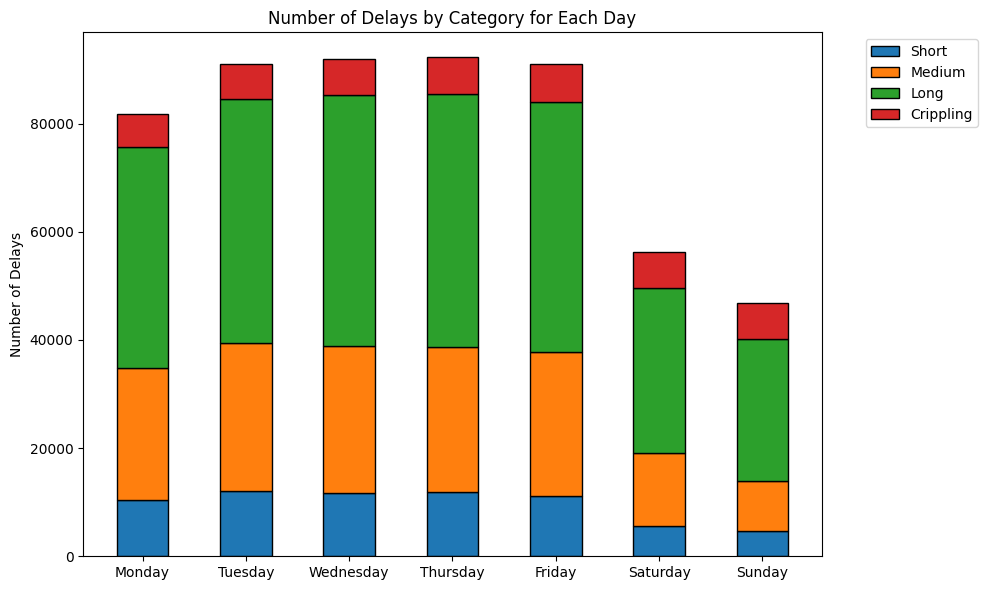

In [16]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for counts of short, medium, long, crippling with adjusted x positions
bar_width = 0.5  # Adjust the width as needed
bar_positions = np.arange(1, len(df_weekday_data) + 1)

# Bar plot for counts of short, medium, long, crippling
ax.bar(bar_positions , df_weekday_data['count_short'], width=bar_width, label='Short', edgecolor='black')
ax.bar(bar_positions, df_weekday_data['count_medium'], bottom=df_weekday_data['count_short'], width=bar_width, label='Medium', edgecolor='black')
ax.bar(bar_positions, df_weekday_data['count_long'], bottom=df_weekday_data['count_short'] + df_weekday_data['count_medium'], width=bar_width, label='Long', edgecolor='black')
ax.bar(bar_positions, df_weekday_data['count_crippling'], bottom=df_weekday_data['count_short'] + df_weekday_data['count_medium'] + df_weekday_data['count_long'], width=bar_width, label='Crippling', edgecolor='black')

# Customize the plot
ax.set_ylabel('Number of Delays')
ax.set_title('Number of Delays by Category for Each Day')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_weekday_data['Day'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the chart border

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [17]:
# Group by 'Route' and 'Delay Type', and aggregate 'Min Delay' with mean and count
df_routes_1 = df_bus_delay.groupby(['Route', 'Delay Type'])['Min Delay'].agg(['mean', 'count']).unstack('Delay Type').reset_index()
# Flatten the multi-level column index and reset column names
df_routes_1.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in df_routes_1.columns]

df_routes_2 = df_bus_delay.groupby('Route')['Min Delay'].agg(mean_min_delay='mean', count_min_delay='count').reset_index()

df_routes= pd.merge(df_routes_1, df_routes_2, on='Route')

# Sort the DataFrame based on the 'count_min_delay' column
df_routes = df_routes.sort_values(by='count_min_delay',ascending=False )
df_routes_top20=df_routes.head(20)
df_routes_top20.head()

,Route,mean_short,mean_medium,mean_long,mean_crippling,count_short,count_medium,count_long,count_crippling,mean_min_delay,count_min_delay
28,29.0,3.267651,6.766607,12.951785,149.432692,5014,7271,2157,728,13.336058,15170
51,52.0,1.854742,6.832900,15.519300,114.173134,833,1921,10907,670,18.172912,14331
31,32.0,1.610592,7.014795,12.349062,120.272973,642,5475,7142,740,15.475320,13999
35,36.0,3.025063,5.914915,14.403602,121.611691,1596,8133,2998,479,11.689232,13206
53,54.0,1.494870,7.089709,13.679036,116.145161,1267,2954,7303,558,15.522596,12082


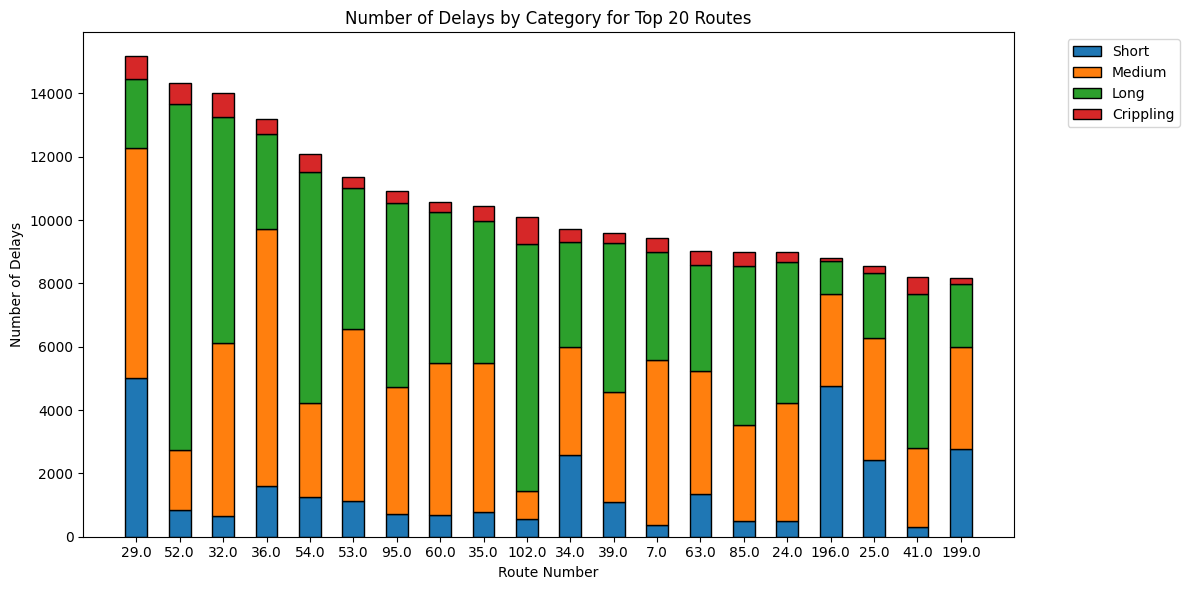

In [18]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for counts of short, medium, long, crippling with adjusted x positions
bar_width = 0.5  # Adjust the width as needed
bar_positions = np.arange(1, len(df_routes_top20) + 1)

# Bar plot for counts of short, medium, long, crippling
ax.bar(bar_positions , df_routes_top20['count_short'], width=bar_width, label='Short', edgecolor='black')
ax.bar(bar_positions, df_routes_top20['count_medium'], bottom=df_routes_top20['count_short'], width=bar_width, label='Medium',edgecolor='black')
ax.bar(bar_positions, df_routes_top20['count_long'], bottom=df_routes_top20['count_short'] + df_routes_top20['count_medium'], width=bar_width, label='Long',edgecolor='black')
ax.bar(bar_positions, df_routes_top20['count_crippling'], bottom=df_routes_top20['count_short'] + df_routes_top20['count_medium'] + df_routes_top20['count_long'], width=bar_width, label='Crippling',edgecolor='black')

# Customize the plot
ax.set_ylabel('Number of Delays')
ax.set_xlabel('Route Number')
ax.set_title('Number of Delays by Category for Top 20 Routes')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_routes_top20['Route'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the chart border

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

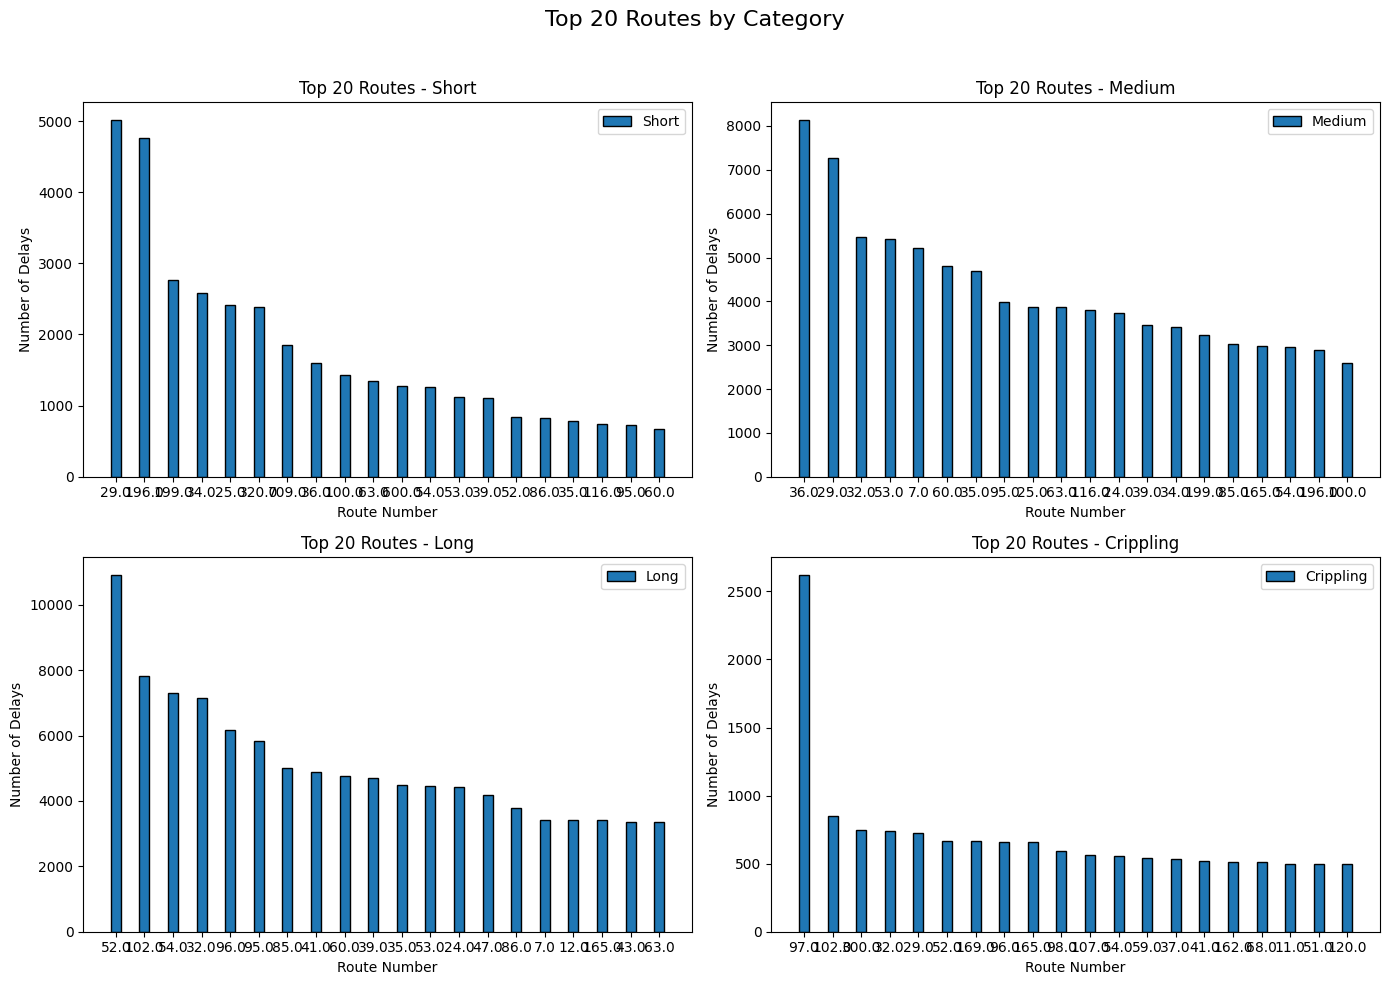

In [19]:
df_routes.head()
df_routes_short_top20=df_routes.sort_values(by='count_short',ascending=False ).head(20)
df_routes_medium_top20=df_routes.sort_values(by='count_medium',ascending=False ).head(20)
df_routes_long_top20=df_routes.sort_values(by='count_long',ascending=False ).head(20)
df_routes_crippling_top20=df_routes.sort_values(by='count_crippling',ascending=False ).head(20)

df_routes_top20_list = [df_routes_short_top20, df_routes_medium_top20, df_routes_long_top20, df_routes_crippling_top20]
categories = ['Short', 'Medium', 'Long', 'Crippling']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=False, sharey=False)
fig.suptitle('Top 20 Routes by Category', fontsize=16)

# Define bar width and positions
bar_width = 0.35
bar_positions = np.arange(20)

for i, (df_routes_top20, category) in enumerate(zip(df_routes_top20_list, categories)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Bar plot for counts of short, medium, long, crippling
    ax.bar(bar_positions, df_routes_top20['count_' + category.lower()], width=bar_width, label=category, edgecolor='black')

    # Customize the plot
    ax.set_ylabel('Number of Delays')
    ax.set_xlabel('Route Number')
    ax.set_title(f'Top 20 Routes - {category}')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(df_routes_top20['Route'])
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()